In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pprint import pprint as pp
import seaborn as sns

In [2]:
import pingouin as pg

In [3]:
ssr = pd.read_csv("sandshark_param_grid_fullResults.csv")

In [4]:
ssr.columns

Index(['Unnamed: 0', 'PartitionKey', 'RowKey',
       'Expectations_RiskyAvg_mean_final', 'Expectations_RiskyAvg_std_final',
       'Expectations_RiskyStd_mean_final', 'Expectations_RiskyStd_std_final',
       'aLvl_meanall', 'aLvl_stdall', 'ammps', 'ammps_config_cmd',
       'ammps_config_gen', 'attention', 'cmdBundle', 'delta_t1', 'delta_t2',
       'dividend_growth_rate', 'dividend_shock_std',
       'dollars_per_hark_money_unit', 'dphm', 'end_day', 'endtime',
       'expectations', 'experimentName', 'filename', 'idx_max_asset_price',
       'idx_max_buy_limit', 'idx_max_sell_limit', 'idx_min_asset_price',
       'inst_val_std', 'kurtosis_buy_limit', 'kurtosis_sell_limit',
       'log_return_DW_statistic', 'log_return_autocorrelation_from_DW',
       'log_return_squared_DW_statistic',
       'log_return_squared_autocorrelation_from_DW', 'mNrm_ratio_StE_meanall',
       'mNrm_ratio_StE_stdall', 'market_class', 'max_asset_price',
       'max_buy_limit', 'max_sell_limit', 'mean_asset_p

In [5]:
ssr = ssr[ssr['status'] == 'Simulation Complete']

In [6]:
ssr[ssr['status_code'] == 1.0]['error_message'][30]

'AMMPS Market Failure: Stopped: Hit market maker price range, shutting market down. ABC MarketMaker Best Ask and Best Bid is outside range 2238 , -250 at 2017-01-11 13:21:09.283859\n'

<Axes: >

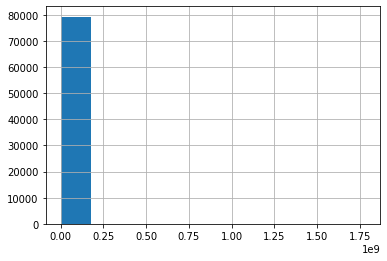

In [7]:
ssr['max_buy_limit'].hist()

In [8]:
np.log(ssr['dphm'].unique())

array([0.        , 5.01063529, 8.00001409])

In [9]:
ssr['dphm'].unique()

array([   1,  150, 2981])

In [10]:
ssr['pop_aNrmInitMean'].unique()

array([ 1, 10, 13,  5,  8])

In [63]:
ssr['log_zeta'] = np.log(ssr['zeta'])
ssr['log_attention'] = np.log(ssr['attention'])
ssr['log_dphm'] = np.log(ssr['dphm'])
ssr['log_mmlucasfactor'] = np.log(ssr['mmlucasfactor'])
ssr['log_pop_aLvl_mean'] = np.log(ssr['total_population_aLvl_mean'])
ssr['log_aLvlmeanall'] = np.log(ssr['aLvl_meanall'])
ssr['log_max_sell_limit'] = np.log(ssr['max_sell_limit'])
ssr['log_max_buy_limit'] = np.log(ssr['max_buy_limit'])

ssr['net_shares'] = ssr['mean_buy_limit'] - ssr['mean_sell_limit']
ssr['log_net_shares'] = np.nan_to_num(np.log(np.abs(ssr['net_shares'])) \
                                      * np.sign(ssr['net_shares']))

ssr['net_shares_as_proportion_of_starting_wealth'] = ssr['net_shares'] / np.exp(ssr['pop_aNrmInitMean'])

# a fake variable to get the effects of these two related variables
ssr['mm_log_lucas_power'] = np.log(ssr['mmsize'] * np.exp(ssr['mmlucasfactor']))

# a fake variable to get the effects of these two related variables
ssr['pop_log_power'] = np.log(ssr['dollars_per_hark_money_unit'] * np.exp(ssr['pop_aNrmInitMean']))

ssr['log_mean_aLvl_lost'] = np.log(np.exp(ssr['pop_aNrmInitMean']) - ssr['total_population_aLvl_mean'])

ssr['mean_aLvl_maintained'] = ssr['total_population_aLvl_mean'] / np.exp(ssr['pop_aNrmInitMean']) 

/home/sb/projects/ufm/SHARKFin/sharkfin-env/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/sb/projects/ufm/SHARKFin/sharkfin-env/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [12]:
np.log(np.abs(ssr['net_shares'])) * np.sign(ssr['net_shares'])

/home/sb/projects/ufm/SHARKFin/sharkfin-env/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


0              NaN
1              NaN
2        -5.962572
3        -5.967289
4       -10.799447
           ...    
80995   -11.023069
80996   -10.990225
80997   -11.360021
80998   -10.847799
80999   -11.244988
Name: net_shares, Length: 79394, dtype: float64

In [13]:
np.sign(ssr['net_shares'])

0        0.0
1        0.0
2       -1.0
3       -1.0
4       -1.0
        ... 
80995   -1.0
80996   -1.0
80997   -1.0
80998   -1.0
80999   -1.0
Name: net_shares, Length: 79394, dtype: float64

<Axes: xlabel='pop_aNrmInitMean', ylabel='log_dphm'>

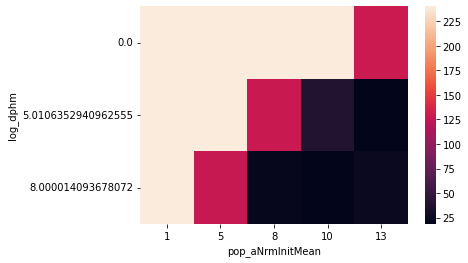

In [14]:
sns.heatmap(
    data = ssr.pivot_table(
        index = 'log_dphm',
        columns = 'pop_aNrmInitMean',
        values = 'end_day'
    )
)


<Axes: xlabel='pop_aNrmInitMean', ylabel='log_dphm'>

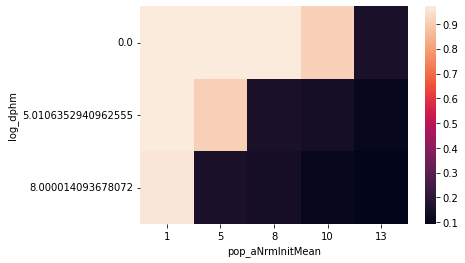

In [15]:
sns.heatmap(
    data = ssr.pivot_table(
        index = 'log_dphm',
        columns = 'pop_aNrmInitMean',
        values = 'price_dividend_pearsonr'
    )
)



<Axes: xlabel='pop_log_power', ylabel='mmlucasfactor'>

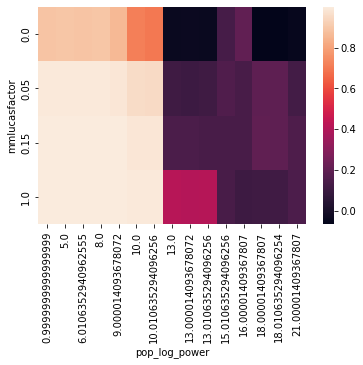

In [50]:
sns.heatmap(
    data = ssr.pivot_table(
        index = 'mmlucasfactor',
        columns = 'pop_log_power',
        values = 'price_dividend_pearsonr'
    )
)

<Axes: xlabel='pop_log_power', ylabel='zeta'>

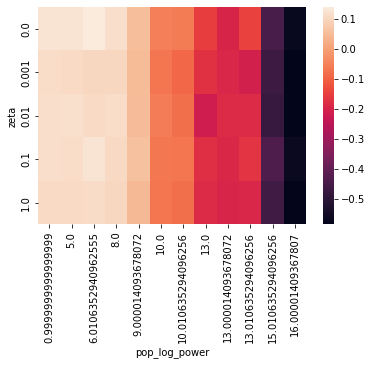

In [86]:
sns.heatmap(
    data = ssr.pivot_table(
        index = 'zeta',
        columns = 'pop_log_power',
        values = 'log_return_autocorrelation_from_DW'
    )
)

<Axes: xlabel='pop_log_power', ylabel='zeta'>

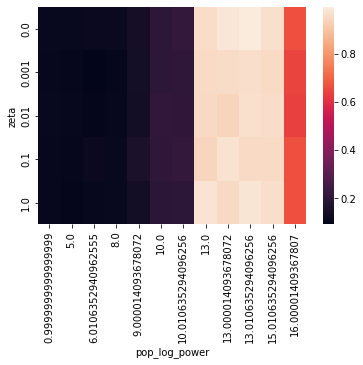

In [87]:
sns.heatmap(
    data = ssr.pivot_table(
        index = 'zeta',
        columns = 'pop_log_power',
        values = 'log_return_squared_autocorrelation_from_DW'
    )
)

<Axes: xlabel='log_max_sell_over_wealth', ylabel='Density'>

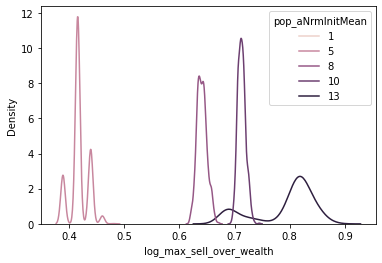

In [52]:
ssr['log_max_sell_over_wealth'] = ssr['log_max_sell_limit'] / ssr['pop_aNrmInitMean']

sns.kdeplot(
    data = ssr[
        (ssr['dphm'] == 1) &
        (ssr['zeta'] == 0.0)
            ],
    x =  'log_max_sell_over_wealth',
    hue = 'pop_aNrmInitMean'
)

<Axes: xlabel='log_max_buy_limit', ylabel='Density'>

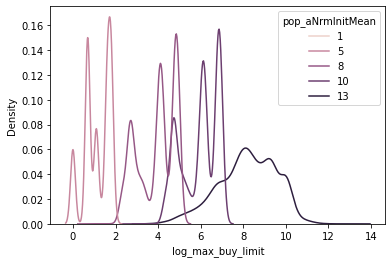

In [18]:
ssr['log_aLvlmeanall'] = np.log(ssr['aLvl_meanall'])

sns.kdeplot(
    data = ssr[(ssr['dphm'] == 1)],
    x =  'log_max_buy_limit',
    hue = 'pop_aNrmInitMean'
)

/tmp/ipykernel_322883/1787124477.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(


<Axes: xlabel='status_code', ylabel='Density'>

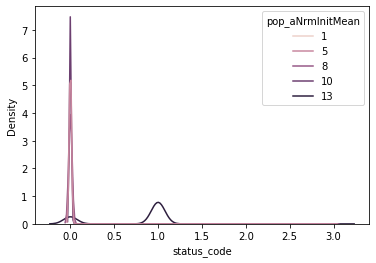

In [19]:
sns.kdeplot(
    data = ssr[(ssr['dphm'] == 1)],
    x =  'status_code',
    hue = 'pop_aNrmInitMean'
)

<Axes: xlabel='idx_max_sell_limit', ylabel='Count'>

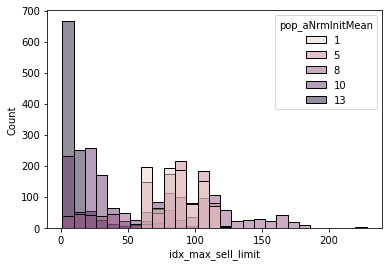

In [56]:
ssr_0 = ssr[
        (ssr['dphm'] == 150) &
        (ssr['zeta'] == 0.0)
    ]

sns.histplot(
    data = ssr_0,
    x =  'idx_max_sell_limit',
    hue = 'pop_aNrmInitMean'
)

#sns.kdeplot(
#    data = ssr_0,
#    x =  'log_max_buy_limit',
#    hue = 'pop_aNrmInitMean'
#)


In [21]:
ssr_0['log_net_shares']

4       -10.799447
5       -10.824657
6       -11.124327
7       -10.717344
8       -10.585019
           ...    
80995   -11.023069
80996   -10.990225
80997   -11.360021
80998   -10.847799
80999   -11.244988
Name: log_net_shares, Length: 5008, dtype: float64

<Axes: xlabel='net_shares_as_proportion_of_starting_wealth', ylabel='Count'>

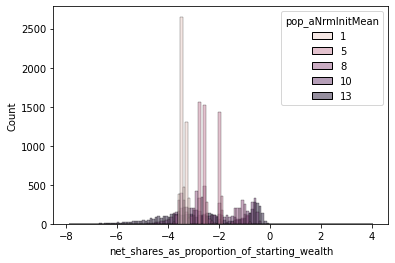

In [55]:


sns.histplot(
    data = ssr_0,
    x =  'net_shares_as_proportion_of_starting_wealth',
    hue = 'pop_aNrmInitMean'
)

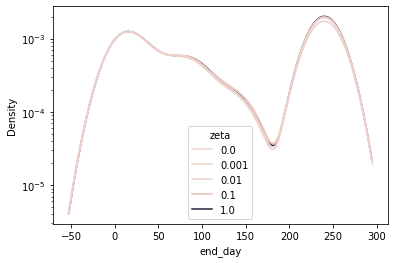

In [23]:
ssr_0 = ssr[
        (ssr['dphm'] == 150) &
        (ssr['pop_aNrmInitMean'] < 15)
    ]

sns.kdeplot(
    data = ssr_0,
    x =  'end_day',
    hue = 'zeta'
)

plt.yscale('log')

<Axes: xlabel='end_day', ylabel='Count'>

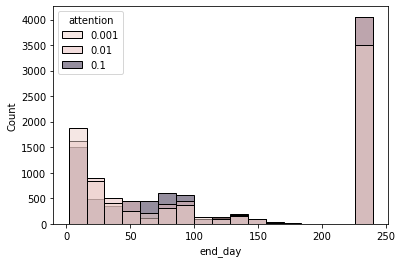

In [54]:
ssr_0 = ssr[
        (ssr['dphm'] == 150)
    ]


sns.histplot(
    data = ssr_0,
    x =  'end_day',
    hue = 'attention'
)

<Axes: xlabel='attention', ylabel='pop_aNrmInitMean'>

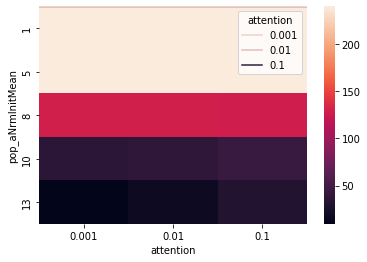

In [25]:

sns.kdeplot(
    data = ssr_0,
    x =  'end_day',
    hue = 'attention'
)

sns.heatmap(
    data = ssr_0.pivot_table(
        index = 'pop_aNrmInitMean',
        columns = 'attention',
        values = 'end_day'
    )
)

In [26]:
ssr_8 = ssr[
        (ssr['dphm'] == 150) &
        (ssr['pop_aNrmInitMean'] == 8)
    ]


<Axes: xlabel='end_day', ylabel='Count'>

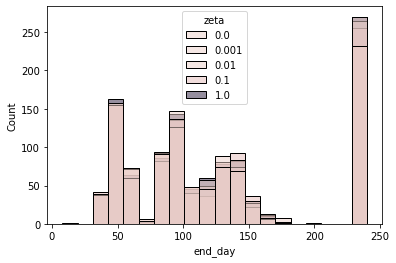

In [53]:
sns.histplot(
    data = ssr_8,
    x =  'end_day',
    hue = 'zeta'
)

<Axes: xlabel='attention', ylabel='zeta'>

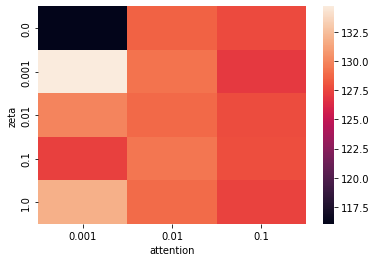

In [28]:


sns.heatmap(
    data = ssr_8.pivot_table(
        index = 'zeta',
        columns = 'attention',
        values = 'end_day'
    )
)

In [29]:
ssr_0['net_shares_as_proportion_of_starting_wealth']

4       -2.224311
5       -2.281099
6       -3.078146
7       -2.048985
8       -1.795025
           ...   
80995   -2.781719
80996   -2.691841
80997   -3.896276
80998   -2.334502
80999   -3.472894
Name: net_shares_as_proportion_of_starting_wealth, Length: 26295, dtype: float64

<Axes: xlabel='idx_max_buy_limit', ylabel='Density'>

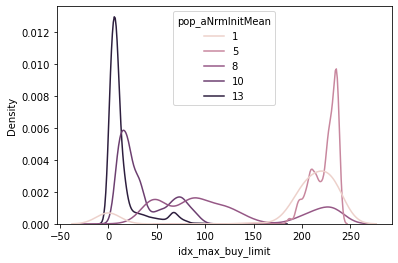

In [30]:
sns.kdeplot(
    data = ssr_0,
    x =  'idx_max_buy_limit',
    hue = 'pop_aNrmInitMean'
)


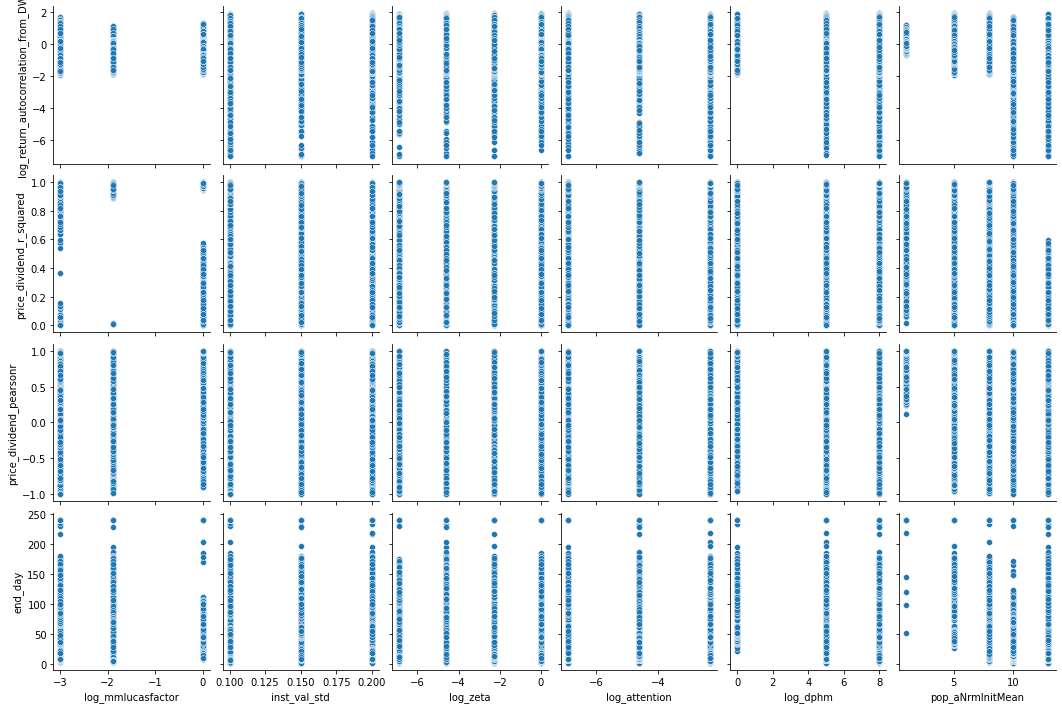

In [31]:
sns.pairplot(
    data = ssr,
    x_vars = [
        #'mmsize',
        "log_mmlucasfactor",
        "inst_val_std",
        "log_zeta",
        'log_attention',
        'log_dphm',
        'pop_aNrmInitMean'
    ],
    y_vars = [
        'log_return_autocorrelation_from_DW',
        #'log_return_squared_autocorrelation_from_DW',
        'price_dividend_r_squared',
        'price_dividend_pearsonr',
        'end_day'
    ]
)

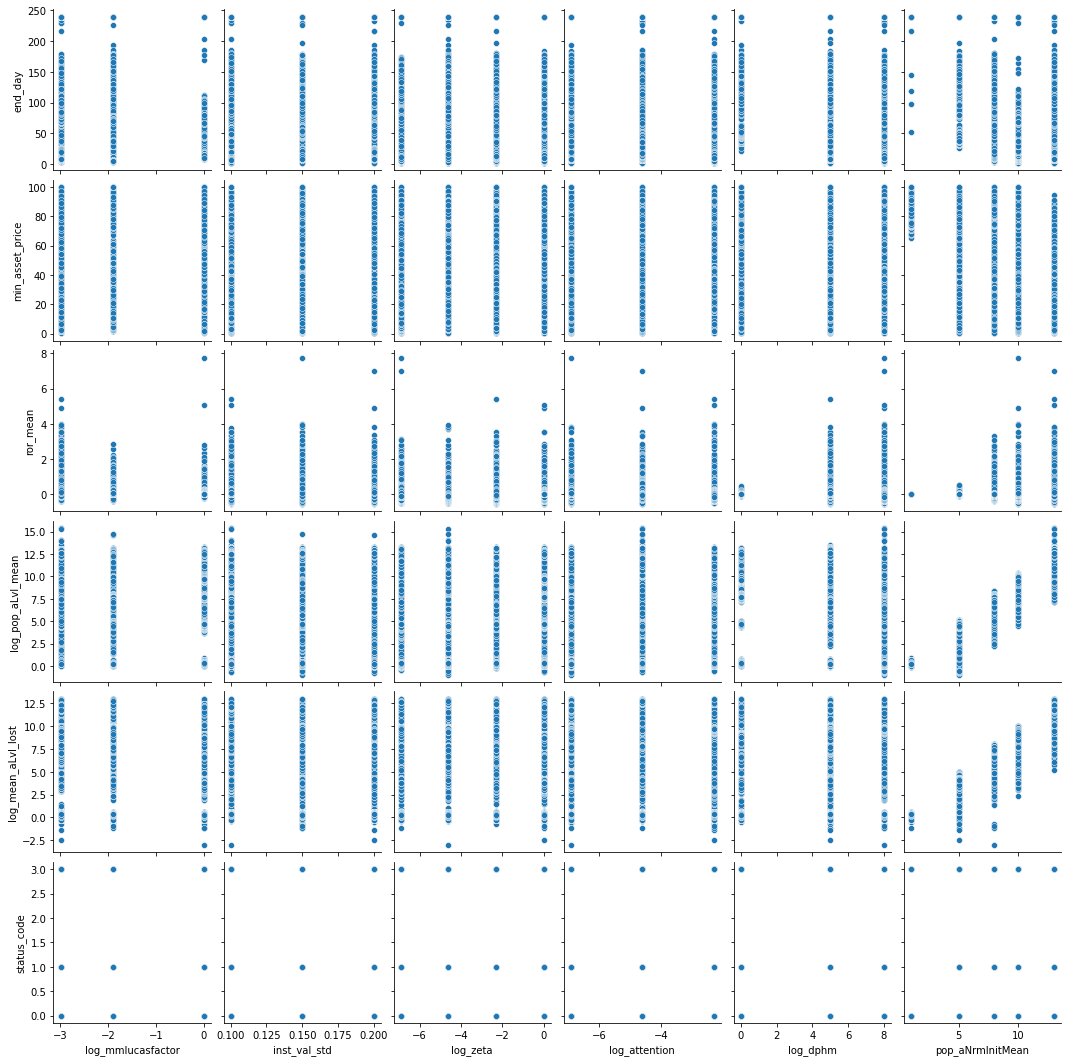

In [32]:
sns.pairplot(
    data = ssr,
    x_vars = [
        #'mmsize',
        "log_mmlucasfactor",
        "inst_val_std",
        "log_zeta",
        'log_attention',
        'log_dphm',
        'pop_aNrmInitMean'
    ],
    y_vars = [
        'end_day',
        'min_asset_price',
        'ror_mean',
        #'ror_volatility',
        'log_pop_aLvl_mean',
        #'aLvl_stdall',
        'log_mean_aLvl_lost',
        'status_code'
    ]
)

<Axes: xlabel='mean_aLvl_maintained', ylabel='Count'>

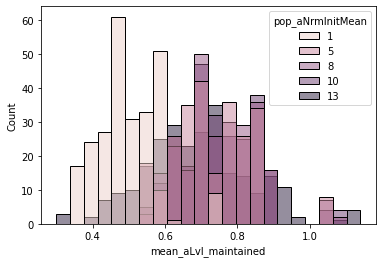

In [83]:


sns.histplot(
    data = ssr[(ssr['dphm'] == 1)& 
               (ssr['zeta'] == 0)&
               (ssr['mmlucasfactor'] == 1.00)
              ],
    x =  'mean_aLvl_maintained',
    hue = 'pop_aNrmInitMean'
)

<Axes: xlabel='log_mean_aLvl_lost', ylabel='Count'>

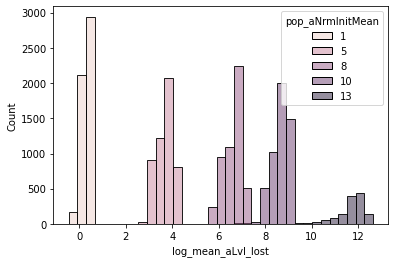

In [60]:


sns.histplot(
    data = ssr[(ssr['dphm'] == 1) & 
               (ssr['end_day'] > 230)
              ],
    x =  'log_mean_aLvl_lost',
    hue = 'pop_aNrmInitMean'
)

<Axes: xlabel='max_sell_limit', ylabel='Density'>

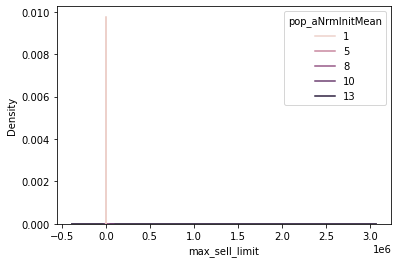

In [34]:
sns.kdeplot(
    data = ssr[(ssr['dphm'] < 2000) &
               (ssr['mmlucasfactor'] == 0.0) &
               (ssr['mmsize'] == 105) &
               (ssr['attention'] < 0.01) &
               (ssr['zeta'] < 0.01)
              ],
    x = 'max_sell_limit',
    hue = 'pop_aNrmInitMean'
)

<Axes: xlabel='log_mean_aLvl_lost', ylabel='Density'>

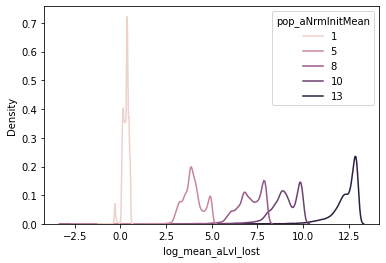

In [35]:
sns.kdeplot(
    data = ssr,
    x = 'log_mean_aLvl_lost',
    hue = 'pop_aNrmInitMean'
)

<Axes: xlabel='log_max_sell_limit', ylabel='Density'>

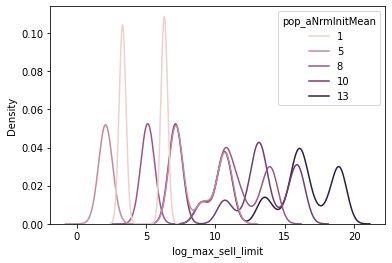

In [36]:
sns.kdeplot(
    data = ssr,
    x = 'log_max_sell_limit',
    hue = 'pop_aNrmInitMean'
)

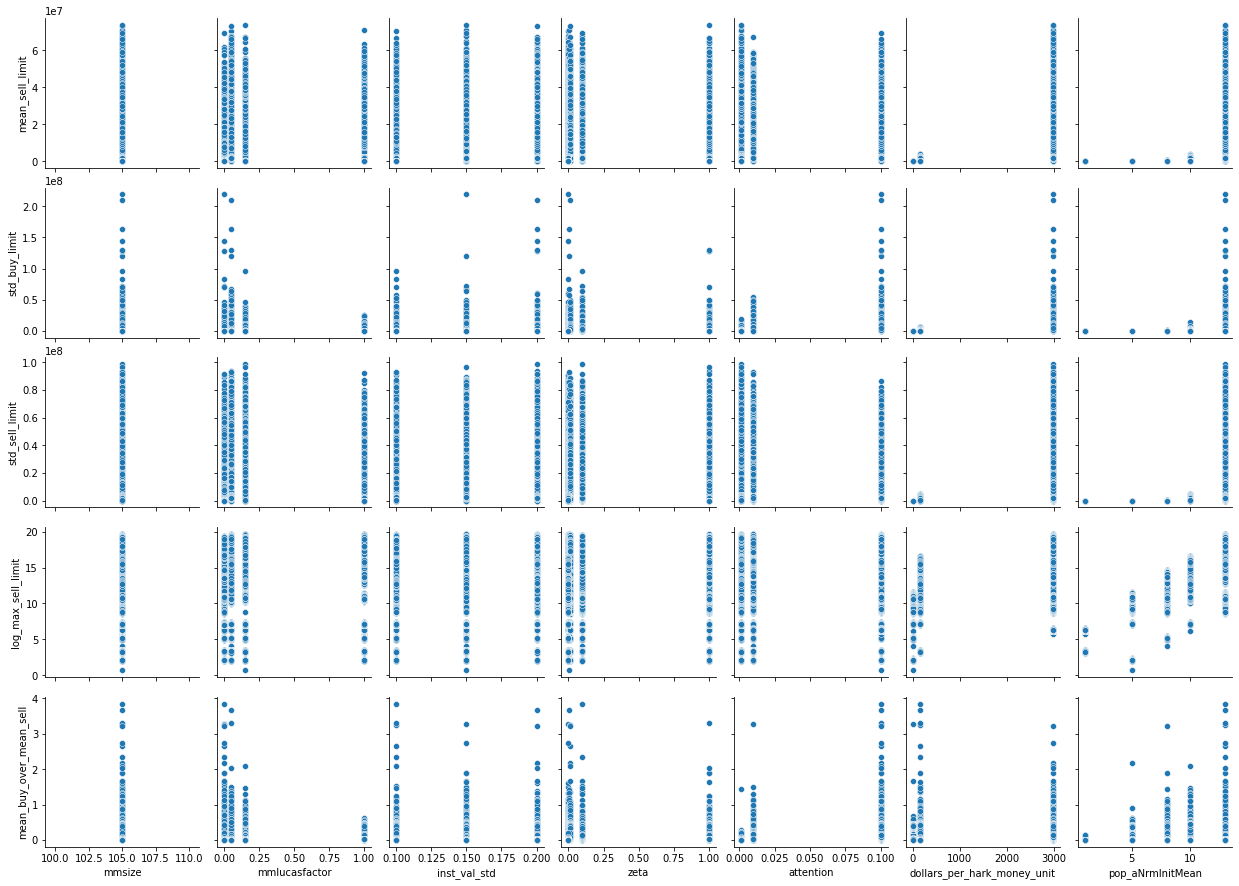

In [37]:
ssr['mean_buy_over_mean_sell'] = ssr['mean_buy_limit'] / ssr['mean_sell_limit']

sns.pairplot(
    data = ssr,
    x_vars = [
        'mmsize',
        "mmlucasfactor",
        "inst_val_std",
        "zeta",
        'attention',
        'dollars_per_hark_money_unit',
        'pop_aNrmInitMean'
    ],
    y_vars = [
        'mean_sell_limit',
        'std_buy_limit',
        'std_sell_limit',
        'log_max_sell_limit',
        'mean_buy_over_mean_sell'
    ]
)

<Axes: xlabel='max_sell_limit', ylabel='Density'>

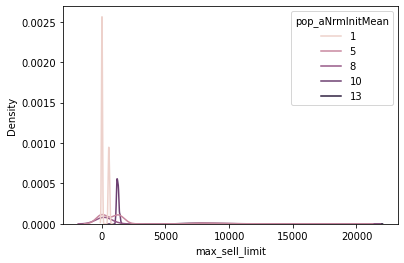

In [38]:
sns.kdeplot(
    data = ssr[(ssr['max_sell_limit']) < 20000],
    x = 'max_sell_limit',
    hue = 'pop_aNrmInitMean'
)

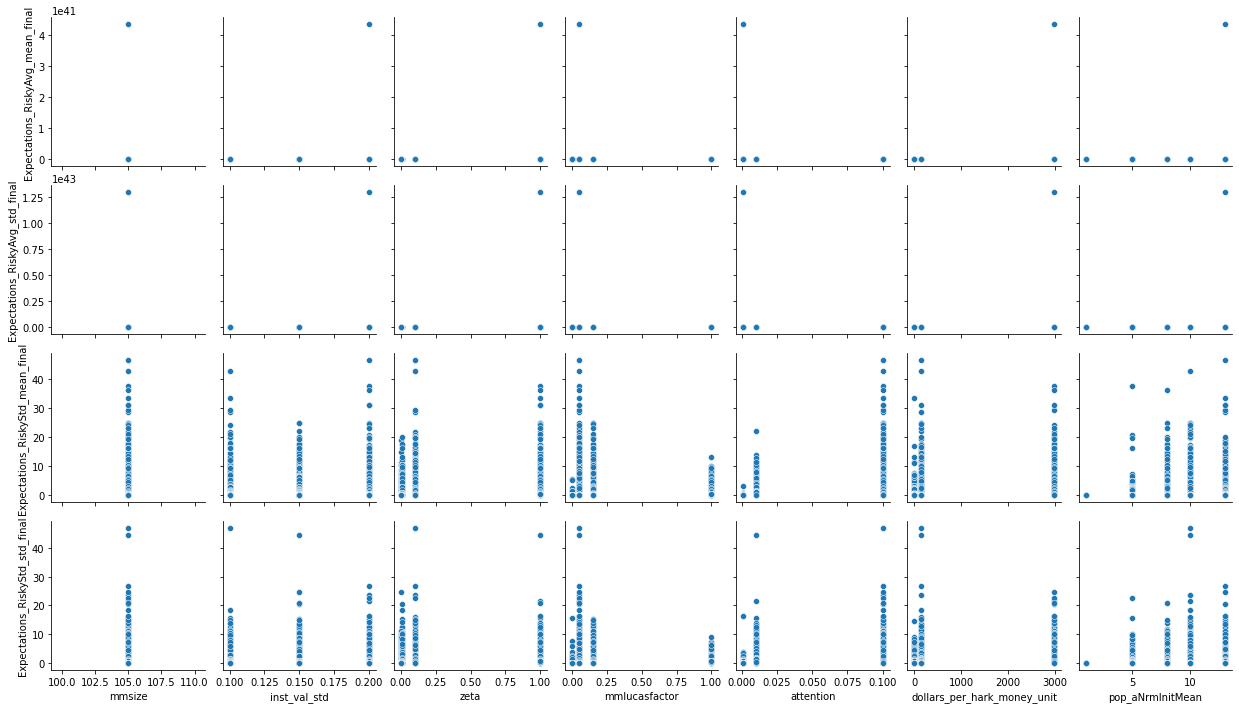

In [39]:
sns.pairplot(
    data = ssr,
    x_vars = [
        'mmsize',
        "inst_val_std",
        "zeta",
        "mmlucasfactor",
        'attention',
        'dollars_per_hark_money_unit',
        'pop_aNrmInitMean'
    ],
    y_vars = [
        'Expectations_RiskyAvg_mean_final',
        'Expectations_RiskyAvg_std_final',
        'Expectations_RiskyStd_mean_final',
        'Expectations_RiskyStd_std_final',
    ]
)

<Axes: xlabel='price_dividend_r_squared', ylabel='Density'>

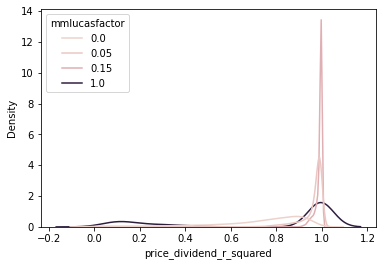

In [40]:
sns.kdeplot(
    data = ssr,
    x = 'price_dividend_r_squared',
    hue = 'mmlucasfactor'
)

<Axes: xlabel='price_dividend_r_squared', ylabel='Density'>

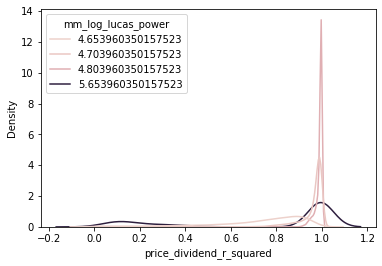

In [41]:
sns.kdeplot(
    data = ssr,
    x = 'price_dividend_r_squared',
    hue = 'mm_log_lucas_power'
)

<Axes: xlabel='price_dividend_r_squared', ylabel='Density'>

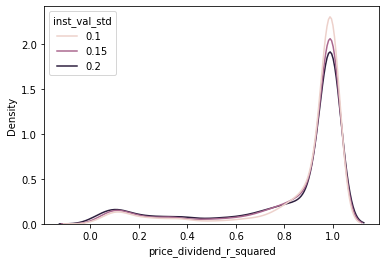

In [42]:
sns.kdeplot(
    data = ssr,
    x = 'price_dividend_r_squared',
    hue = 'inst_val_std'
)

<Axes: xlabel='pop_log_power', ylabel='mm_log_lucas_power'>

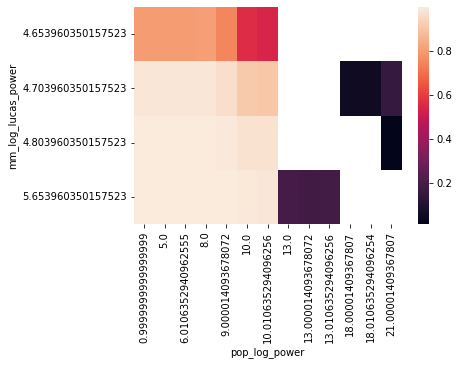

In [43]:
sns.heatmap(
    data = ssr.pivot_table(
        index = 'mm_log_lucas_power',
        columns = 'pop_log_power',
        values = 'price_dividend_r_squared'
    )
)

<Axes: xlabel='pop_log_power', ylabel='mmsize'>

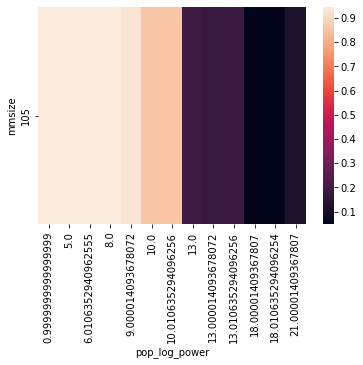

In [44]:
sns.heatmap(
    data = ssr.pivot_table(
        index = 'mmsize',
        columns = 'pop_log_power',
        values = 'price_dividend_r_squared'
    )
)

<Axes: xlabel='inst_val_std', ylabel='attention'>

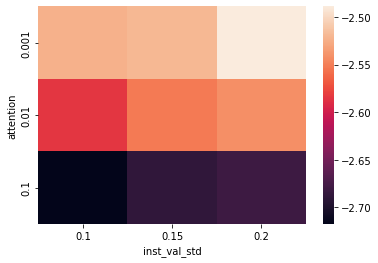

In [45]:
## This is interesting.
ssr['log_ror_volatility'] = np.log(ssr['ror_volatility'])
sns.heatmap(
    data = ssr.pivot_table(
        index = 'attention',
        columns = 'inst_val_std',
        values = 'log_ror_volatility'
    )
)

<Axes: xlabel='zeta', ylabel='attention'>

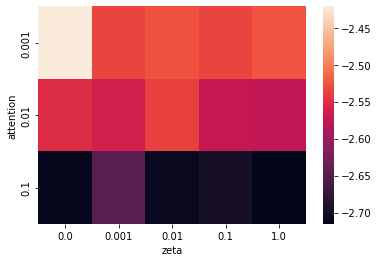

In [46]:
## This is interesting.

sns.heatmap(
    data = ssr.pivot_table(
        index = 'attention',
        columns = 'zeta',
        values = 'log_ror_volatility'
    )
)

<Axes: xlabel='zeta', ylabel='pop_log_power'>

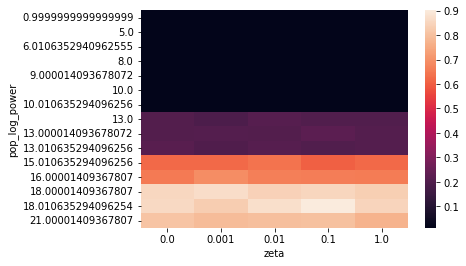

In [47]:

sns.heatmap(
    data = ssr.pivot_table(
        index = 'pop_log_power',
        columns = 'zeta',
        values = 'ror_volatility'
    )
)

<Axes: xlabel='attention', ylabel='pop_log_power'>

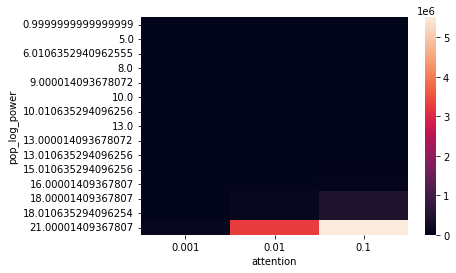

In [48]:
sns.heatmap(
    data = ssr.pivot_table(
        index = 'pop_log_power',
        columns = 'attention',
        values = 'mean_buy_limit'
    )
)

In [49]:
sns.heatmap(
    data = ssr[ssr['mm']].pivot_table(
        index = 'pop_log_power',
        columns = 'attention',
        values = 'max_sell_limit'
    )
)

KeyError: 'mm'

In [ ]:
ssr[ssr['end_day']< 100][['end_day','mean_buy_limit']]

In [ ]:
sns.kdeplot(
    data = ssr,
    x = 'log_ror_volatility',
    hue = 'attention'
)

In [ ]:
sns.heatmap(
    data = ssr.pivot_table(
        index = 'log_zeta',
        columns = 'pop_log_power',
        values = 'price_dividend_r_squared'
    )
)

In [ ]:
sns.heatmap(
    data = ssr.pivot_table(
        index = 'mm_log_lucas_power',
        columns = 'pop_log_power',
        values = 'ror_mean'
    )
)

In [ ]:
sns.heatmap(
    data = ssr.pivot_table(
        index = 'mm_log_lucas_power',
        columns = 'pop_log_power',
        values = 'ror_volatility'
    )
)

In [ ]:
sns.heatmap(
    data = ssr.pivot_table(
        index = 'mm_log_lucas_power',
        columns = 'pop_log_power',
        values = 'log_return_autocorrelation_from_DW',
    )
)

In [ ]:
sns.heatmap(
    data = ssr.pivot_table(
        index = 'mm_log_lucas_power',
        columns = 'pop_log_power',
        values = 'log_return_squared_autocorrelation_from_DW',
    )
)

In [ ]:
sns.heatmap(
    data = ssr.pivot_table(
        index = 'mm_log_lucas_power',
        columns = 'pop_log_power',
        values = 'Expectations_RiskyAvg_mean_final',
    )
)

In [ ]:
sns.heatmap(
    data = ssr.pivot_table(
        index = 'mm_log_lucas_power',
        columns = 'pop_log_power',
        values = 'Expectations_RiskyAvg_std_final',
    )
)

In [ ]:
sns.heatmap(
    data = ssr.pivot_table(
        index = 'mm_lucas_factor',
        columns = 'pop_log_power',
        values = 'end_day',
    )
)

In [ ]:
sns.heatmap(
    data = ssr.pivot_table(
        index = 'attention',
        columns = 'zeta',
        values = 'Expectations_RiskyStd_std_final',
    )
)

In [ ]:
sns.heatmap(
    data = ssr.pivot_table(
        index = 'mm_log_lucas_power',
        columns = 'pop_log_power',
        values = 'end_day'
    )
)

In [ ]:
sns.kdeplot(
    data = ssr,
    x = 'seconds',
    hue = 'mmlucasfactor'
)

In [ ]:
sns.kdeplot(
    data = ssr,
    x = 'price_dividend_r_squared',
    hue = 'pop_log_power'
)

In [ ]:
sns.kdeplot(
    data = ssr,
    x = 'price_dividend_r_squared',
    hue = 'pop_aNrmInitMean'
)

In [ ]:
sns.kdeplot(
    data = ssr,
    x = 'price_dividend_r_squared',
    hue = 'dollars_per_hark_money_unit'
)

In [ ]:
sns.pairplot(
    data = ssr,
    x_vars = [
        'mmsize',
        "mmlucasfactor",
        "inst_val_std",
        "zeta",
        'attention',
        'dollars_per_hark_money_unit',
        'pop_aNrmInitMean'
    ],
    y_vars = [
        'end_day',
        'max_buy_limit',
        'max_asset_price'
    ]
)

In [ ]:
sns.pairplot(
    data = ssr,
    x_vars = [
        'mmsize',
        "mmlucasfactor",
        "inst_val_std",
        "zeta",
        'attention',
        'dollars_per_hark_money_unit',
        'pop_aNrmInitMean'
    ],
    y_vars = [
        'aLvl_meanall', 'aLvl_stdall',
        'idx_max_asset_price', 'idx_max_buy_limit', 'idx_max_sell_limit',
        'idx_min_asset_price', 'kurtosis_buy_limit',
        'kurtosis_sell_limit', 
        'log_return_autocorrelation_from_DW',
        'log_return_squared_autocorrelation_from_DW',
        'max_asset_price',
        'max_buy_limit', 'max_sell_limit', 'mean_asset_price', 'mean_buy_limit',
        'mean_sell_limit', 'min_asset_price',
        'price_dividend_r_squared',
        'ror_mean',
        'ror_volatility',
        'seconds',
        'skew_buy_limit', 'skew_sell_limit',
        'status_code', 'std_asset_price',
        'std_buy_limit', 'std_sell_limit',
        'total_population_aLvl_mean', 'total_population_aLvl_std'
    ]
)

In [ ]:
ssr.sort_values('price_dividend_r_squared')[[
    'price_dividend_r_squared',
    'seconds',
    "mmlucasfactor",
        "inst_val_std",
        "zeta",
        'attention',
        'dollars_per_hark_money_unit',
        'pop_aNrmInitMean'
    
]]

In [ ]:
ssr.sort_values('price_dividend_r_squared')[[
    'price_dividend_r_squared',
    'status_code',
    "mmlucasfactor",
        "inst_val_std",
        "zeta",
        'attention',
        'dollars_per_hark_money_unit',
        'pop_aNrmInitMean'
    
]].dropna().corr()

In [ ]:
ssr.groupby(['status_code']).count()

In [ ]:
corrs = ssr[[
        'mmsize',
        "mmlucasfactor",
        "inst_val_std",
        "zeta",
        'attention',
        'dollars_per_hark_money_unit',
        'pop_aNrmInitMean',
        'Expectations_RiskyAvg_mean_final', 'Expectations_RiskyAvg_std_final',
        'Expectations_RiskyStd_mean_final', 'Expectations_RiskyStd_std_final',
        'aLvl_meanall', 'aLvl_stdall',
        'end_day',
        'idx_max_asset_price', 'idx_max_buy_limit', 'idx_max_sell_limit',
        'idx_min_asset_price', 'kurtosis_buy_limit',
        'kurtosis_sell_limit', 
        'log_return_autocorrelation_from_DW',
        'log_return_squared_autocorrelation_from_DW',
        'max_asset_price',
        'max_buy_limit', 'max_sell_limit', 'mean_asset_price', 'mean_buy_limit',
        'mean_sell_limit', 'min_asset_price',
        'price_dividend_r_squared',
        'ror_mean',
        'ror_volatility',
        'seconds',
        'skew_buy_limit', 'skew_sell_limit',
        'status_code', 'std_asset_price',
        'std_buy_limit', 'std_sell_limit',
        'total_population_aLvl_mean', 'total_population_aLvl_std'
]].corr()


(abs(corrs ) > 1e-2) * corrs

In [ ]:
ssr[['end_day']].hist()

In [ ]:
sns.pairplot(
    data = ssr,
    x_vars = [
        'mm_log_lucas_power',
        "inst_val_std",
        "zeta",
        "attention",
        'pop_log_power'
    ],
    y_vars = [
        'log_return_autocorrelation_from_DW',
        'price_dividend_pearsonr',
        'end_day',
        'max_asset_price',
        'ror_mean',
        'ror_volatility',
        'aLvl_meanall',
        'aLvl_stdall',
        'Expectations_RiskyAvg_mean_final',
        'Expectations_RiskyAvg_std_final',
        'Expectations_RiskyStd_mean_final',
        'Expectations_RiskyStd_std_final',
    ]
)

In [ ]:
sns.pairplot(
    data = ssr,
    x_vars = [
        'ror_mean',
        'aLvl_meanall',
        'Expectations_RiskyAvg_mean_final',
        'Expectations_RiskyStd_mean_final',
        
    ],
    y_vars = [
        "attention",
        
    ]
)

In [ ]:
ssr.partial_corr(
    x=['zeta'],
    y='price_dividend_r_squared',
    covar=["mmlucasfactor",'mmsize',"dollars_per_hark_money_unit",'pop_aNrmInitMean']
)

In [ ]:
ssr.partial_corr(
    x=['attention'],
    y='price_dividend_r_squared',
    covar=["mmlucasfactor",'mmsize',"dollars_per_hark_money_unit",'pop_aNrmInitMean']
)

In [ ]:
ssr.partial_corr(
    x=["inst_val_std"],
    y='price_dividend_r_squared',
    covar=["mmlucasfactor",'mmsize',"dollars_per_hark_money_unit",'pop_aNrmInitMean']
)

In [ ]:
ssr_anova[:20]

In [ ]:
ssr['log_Expectations_RiskyStd_std_final'] = np.log(ssr['Expectations_RiskyStd_std_final'])

sns.kdeplot(
    data = ssr[ssr['mmsize'] == 105],
    x = 'log_Expectations_RiskyStd_std_final',
    hue = 'zeta'
)

In [ ]:


ssr.groupby([
    'mmsize',
    "mmlucasfactor",
    'dollars_per_hark_money_unit',
    'pop_aNrmInitMean'
])[
    #"inst_val_std",
    "zeta",
    "attention",
    'price_dividend_pearsonr',
    #'end_day',
    #'ror_mean',
    'ror_volatility',
    #'aLvl_meanall',
    #'Expectations_RiskyAvg_mean_final',
    #'Expectations_RiskyAvg_std_final',
    #'Expectations_RiskyStd_mean_final',
    #'Expectations_RiskyStd_std_final',
].corr()[[
    'zeta'
    #'price_dividend_pearsonr',
    #'end_day',
    #'ror_mean',
    #'ror_volatility',
    #'aLvl_meanall',
    #'Expectations_RiskyAvg_mean_final',
    #'Expectations_RiskyAvg_std_final',
    #'Expectations_RiskyStd_mean_final',
    #'Expectations_RiskyStd_std_final',
]]

        
        
        

In [ ]:
inst_val_corr = ssr.corr()["inst_val_std"]

inst_val_corr[inst_val_corr > 0.002]

In [ ]:
ssr['agent-settings'] = ssr['mmsize'] + ssr["mmlucasfactor"] + ssr['dollars_per_hark_money_unit'] + ssr['pop_aNrmInitMean']


In [ ]:
ssr['agent-settings']

In [ ]:
sns.kdeplot(
    data = ssr,
    x = 'log_ror_volatility',
    hue = 'agent-settings'
)

In [ ]:
ssr['mmsize']

In [ ]:
ssrx = ssr.groupby([
    'mmsize',
    "mmlucasfactor",
    'dollars_per_hark_money_unit',
    'pop_aNrmInitMean'
])[['ror_volatility','Expectations_RiskyStd_mean_final']].corr().reset_index()


sns.pairplot(
    data = ssrx[ssrx['level_4'] == 'Expectations_RiskyStd_mean_final'],
    x_vars = [
        'mmsize',
        "mmlucasfactor",
        'dollars_per_hark_money_unit',
        'pop_aNrmInitMean'
    ],
    y_vars = [
        'ror_volatility'
    ]
)


In [ ]:
ssry = ssr.groupby([
    'mmsize',
    "mmlucasfactor",
    'dollars_per_hark_money_unit',
    'pop_aNrmInitMean',
    'attention',
    'zeta'
])[['ror_mean','Expectations_RiskyAvg_mean_final']].corr().reset_index()

ssry = ssry[ssry['level_6'] == 'Expectations_RiskyAvg_mean_final']

sns.pairplot(
    data = ssry[ssry['level_6'] == 'Expectations_RiskyAvg_mean_final'],
    x_vars = [
        'mmsize',
        "mmlucasfactor",
        'dollars_per_hark_money_unit',
        'pop_aNrmInitMean',
        'attention',
        'zeta'
    ],
    y_vars = [
        'ror_mean'
    ]
)

In [ ]:
sns.kdeplot(
    data = ssry,
    x = 'ror_mean',
    hue = 'attention'
)

In [ ]:
sns.kdeplot(
    data = ssry,
    x = 'ror_mean',
    hue = 'dollars_per_hark_money_unit'
)

In [ ]:
ssr.columns

In [ ]:
ssr[ssr['mmsize'] == 105]['pop_log_power']

In [ ]:

from scipy.stats import zscore

In [ ]:
zscore(ssr['attention']) - zscore(ssr['attention'])

In [ ]:
plt.hist(np.exp(ssr['pop_aNrmInitMean']) - ssr['aLvl_meanall'], bins=100)

In [ ]:
(np.exp(ssr['pop_aNrmInitMean']) - ssr['aLvl_meanall'])

In [ ]:
sns.kdeplot(
    data = ssr,
    x = 'log_ror_volatility',
    hue = 'agent-settings'
)